In [1]:
# Imports for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all the dataframes
MV411         = pd.read_csv('Ravi_SNPs_for_MV4-11_annotated.csv', header=117)
MV411R2       = pd.read_csv('Ravi_SNPs_for_MV411R2_annotated.csv', header=117)
MV411R3       = pd.read_csv('Ravi_SNPs_for_MV411R3_annotated.csv', header=117)
Molm13        = pd.read_csv('Ravi_SNPs_for_Molm13_annotated.csv', header=117)
Molm13R3      = pd.read_csv('Ravi_SNPs_for_Molm13R3_annotated.csv', header=117)
Molm14        = pd.read_csv('Ravi_SNPs_for_Molm14_annotated.csv', header=117)
Molm14R1      = pd.read_csv('Ravi_SNPs_for_Molm14R1_annotated.csv', header=117)
Molm14R2      = pd.read_csv('Ravi_SNPs_for_Molm14R2_annotated.csv', header=117)
Molm14R3      = pd.read_csv('Ravi_SNPs_for_Molm14R3_annotated.csv', header=117)
Molm14AC220R3 = pd.read_csv('Ravi_SNPs_for_Molm14AC220R3_annotated.csv', header=117)

# MV411R2 has some missing values so we can drop those, this is only ~6 rows total
MV411R2.dropna(inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Make an descriptive index column for each dataframe.

data = [MV411, MV411R2, MV411R3, Molm13, Molm13R3, Molm14, Molm14R1, Molm14R2, Molm14R3, Molm14AC220R3]

for dat in data: 
    dat['index']='chr'+dat['#CHROM'].astype(str)+'_'+dat['POS'].astype(str)+'_'+dat['REF'].astype(str)+'>'+dat['ALT'].astype(str)
    dat.set_index('index', inplace=True)
    dat.drop(columns=['#CHROM','POS','REF','ALT'], axis = 1, inplace=True)

In [4]:
# Find out the mutations that occur in both the parent and resistant cell line

mv411r2merge = MV411.index.intersection(MV411R2.index)
mv411r3merge = MV411.index.intersection(MV411R3.index)
molm13r3merge = Molm13.index.intersection(Molm13R3.index)
molm14r1merge = Molm14.index.intersection(Molm14R1.index)
molm14r2merge = Molm14.index.intersection(Molm14R2.index)
molm14r3merge = Molm14.index.intersection(Molm14R3.index)
molm14ac220r3merge = Molm14.index.intersection(Molm14AC220R3.index)

In [5]:
# Print out the values of the intersection between the parent and resistant cell lines.

print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'MV4-11', len(MV411.index), 'MV4-11_R2', len(MV411R2.index), len(mv411r2merge), (len(MV411R2.index)-len(mv411r2merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'MV4-11', len(MV411.index), 'MV4-11_R3', len(MV411R3.index), len(mv411r3merge), (len(MV411R3.index)-len(mv411r3merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'Molm13', len(Molm13.index), 'Molm13_R3', len(Molm13R3.index), len(molm13r3merge), (len(Molm13R3.index)-len(molm13r3merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'Molm14', len(Molm14.index), 'Molm14_R1', len(Molm14R1.index), len(molm14r1merge), (len(Molm14R1.index)-len(molm14r1merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'Molm14', len(Molm14.index), 'Molm14_R2', len(Molm14R2.index), len(molm14r2merge), (len(Molm14R2.index)-len(molm14r2merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'Molm14', len(Molm14.index), 'Molm14_R3', len(Molm14R3.index), len(molm14r3merge), (len(Molm14R3.index)-len(molm14r3merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'Molm14', len(Molm14.index), 'Molm14_ac220_R3', len(Molm14AC220R3.index), len(molm14ac220r3merge), (len(Molm14AC220R3.index)-len(molm14ac220r3merge))))


MV4-11 has 48249 mutations and MV4-11_R2 has 46939 mutations relative to HG37. 16435 of the mutations overlap, 
so MV4-11_R2 has 30504 unique mutations
MV4-11 has 48249 mutations and MV4-11_R3 has 41743 mutations relative to HG37. 22719 of the mutations overlap, 
so MV4-11_R3 has 19024 unique mutations
Molm13 has 47891 mutations and Molm13_R3 has 57578 mutations relative to HG37. 27064 of the mutations overlap, 
so Molm13_R3 has 30514 unique mutations
Molm14 has 48669 mutations and Molm14_R1 has 49055 mutations relative to HG37. 25525 of the mutations overlap, 
so Molm14_R1 has 23530 unique mutations
Molm14 has 48669 mutations and Molm14_R2 has 50160 mutations relative to HG37. 25418 of the mutations overlap, 
so Molm14_R2 has 24742 unique mutations
Molm14 has 48669 mutations and Molm14_R3 has 345918 mutations relative to HG37. 26101 of the mutations overlap, 
so Molm14_R3 has 319817 unique mutations
Molm14 has 48669 mutations and Molm14_ac220_R3 has 45744 mutations relative to HG37. 2

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

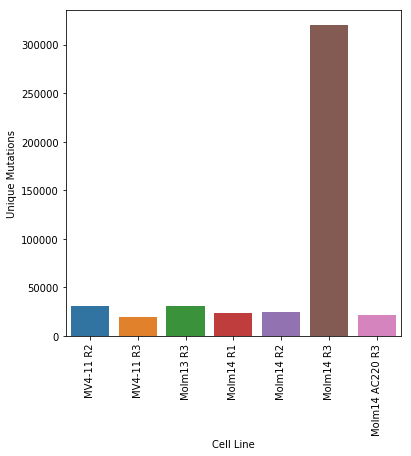

In [6]:
# Make a dataframe to plot
d = {'Cell Line':['MV4-11 R2', 'MV4-11 R3', 'Molm13 R3', 'Molm14 R1', 'Molm14 R2', 'Molm14 R3', 'Molm14 AC220 R3'],
    'Unique Mutations':[30504, 19024, 30514, 23530, 24742, 319817, 21991]}
df = pd.DataFrame(d)

# Plot usining sns borplot
plt.figure(figsize=(6,6))
sns.barplot(x = 'Cell Line', y='Unique Mutations', data=df)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

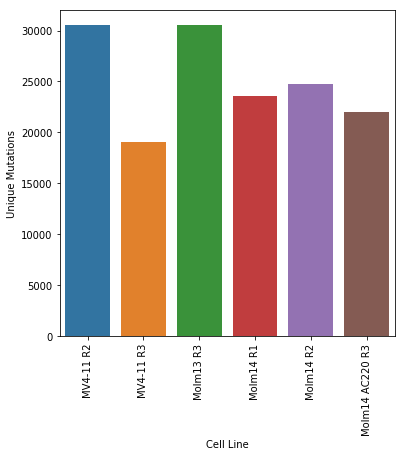

In [7]:
# Note I left out Molm14 R3 here because it was sequenced to 10X the depth of all the other cell lines, 
# therefore the number of mutation in that cell line is probably not an accurate representation of the number of mutations
d = {'Cell Line':['MV4-11 R2', 'MV4-11 R3', 'Molm13 R3', 'Molm14 R1', 'Molm14 R2', 'Molm14 AC220 R3'],
    'Unique Mutations':[30504, 19024, 30514, 23530, 24742, 21991]}
df = pd.DataFrame(d)

# Plot usining sns borplot
plt.figure(figsize=(6,6))
sns.barplot(x = 'Cell Line', y='Unique Mutations', data=df)
plt.xticks(rotation='vertical')

In [8]:
print('Each cell line has on average {} unique mutations, with a standard deviation of {}'.format(np.mean(df['Unique Mutations']), np.std(df['Unique Mutations'])))

Each cell line has on average 25050.833333333332 unique mutations, with a standard deviation of 4236.288250212548


In [9]:
# Get on the protein-coding mutations from each cell line
MV411=MV411[MV411['INFO'].str.contains('protein_coding', na=False)]
MV411R2=MV411R2[MV411R2['INFO'].str.contains('protein_coding', na=False)]
MV411R3=MV411R3[MV411R3['INFO'].str.contains('protein_coding', na=False)]
Molm13=Molm13[Molm13['INFO'].str.contains('protein_coding', na=False)]
Molm13R3=Molm13R3[Molm13R3['INFO'].str.contains('protein_coding', na=False)]
Molm14=Molm14[Molm14['INFO'].str.contains('protein_coding', na=False)]
Molm14R1=Molm14R1[Molm14R1['INFO'].str.contains('protein_coding', na=False)]
Molm14R2=Molm14R2[Molm14R2['INFO'].str.contains('protein_coding', na=False)]
Molm14R3=Molm14R3[Molm14R3['INFO'].str.contains('protein_coding', na=False)]
Molm14AC220R3=Molm14AC220R3[Molm14AC220R3['INFO'].str.contains('protein_coding', na=False)]
    
# Find out the protein-coding mutations that occur in both the parent and resistant cell line
mv411r2merge = MV411.index.intersection(MV411R2.index)
mv411r3merge = MV411.index.intersection(MV411R3.index)
molm13r3merge = Molm13.index.intersection(Molm13R3.index)
molm14r1merge = Molm14.index.intersection(Molm14R1.index)
molm14r2merge = Molm14.index.intersection(Molm14R2.index)
molm14r3merge = Molm14.index.intersection(Molm14R3.index)
molm14ac220r3merge = Molm14.index.intersection(Molm14AC220R3.index)

# Print out the values of the intersection between the parent and resistant cell lines.
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'MV4-11', len(MV411.index), 'MV4-11_R2', len(MV411R2.index), len(mv411r2merge), (len(MV411R2.index)-len(mv411r2merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'MV4-11', len(MV411.index), 'MV4-11_R3', len(MV411R3.index), len(mv411r3merge), (len(MV411R3.index)-len(mv411r3merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'Molm13', len(Molm13.index), 'Molm13_R3', len(Molm13R3.index), len(molm13r3merge), (len(Molm13R3.index)-len(molm13r3merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'Molm14', len(Molm14.index), 'Molm14_R1', len(Molm14R1.index), len(molm14r1merge), (len(Molm14R1.index)-len(molm14r1merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'Molm14', len(Molm14.index), 'Molm14_R2', len(Molm14R2.index), len(molm14r2merge), (len(Molm14R2.index)-len(molm14r2merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'Molm14', len(Molm14.index), 'Molm14_R3', len(Molm14R3.index), len(molm14r3merge), (len(Molm14R3.index)-len(molm14r3merge))))
print("""{0} has {1} mutations and {2} has {3} mutations relative to HG37. {4} of the mutations overlap, 
so {2} has {5} unique mutations""".format(
    'Molm14', len(Molm14.index), 'Molm14_ac220_R3', len(Molm14AC220R3.index), len(molm14ac220r3merge), (len(Molm14AC220R3.index)-len(molm14ac220r3merge))))

MV4-11 has 33169 mutations and MV4-11_R2 has 32048 mutations relative to HG37. 11783 of the mutations overlap, 
so MV4-11_R2 has 20265 unique mutations
MV4-11 has 33169 mutations and MV4-11_R3 has 29169 mutations relative to HG37. 17159 of the mutations overlap, 
so MV4-11_R3 has 12010 unique mutations
Molm13 has 32732 mutations and Molm13_R3 has 39728 mutations relative to HG37. 20316 of the mutations overlap, 
so Molm13_R3 has 19412 unique mutations
Molm14 has 33291 mutations and Molm14_R1 has 33720 mutations relative to HG37. 19088 of the mutations overlap, 
so Molm14_R1 has 14632 unique mutations
Molm14 has 33291 mutations and Molm14_R2 has 33877 mutations relative to HG37. 18960 of the mutations overlap, 
so Molm14_R2 has 14917 unique mutations
Molm14 has 33291 mutations and Molm14_R3 has 152681 mutations relative to HG37. 18928 of the mutations overlap, 
so Molm14_R3 has 133753 unique mutations
Molm14 has 33291 mutations and Molm14_ac220_R3 has 30722 mutations relative to HG37. 1

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

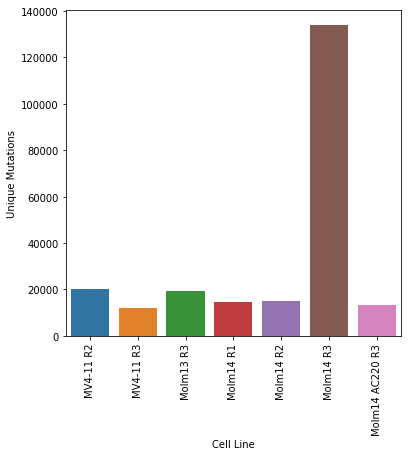

In [10]:
# Make a dataframe to plot
d = {'Cell Line':['MV4-11 R2', 'MV4-11 R3', 'Molm13 R3', 'Molm14 R1', 'Molm14 R2', 'Molm14 R3', 'Molm14 AC220 R3'],
    'Unique Mutations':[20265, 12010, 19412, 14632, 14917, 133753, 13190]}
df = pd.DataFrame(d)

# Plot usining sns borplot
plt.figure(figsize=(6,6))
sns.barplot(x = 'Cell Line', y='Unique Mutations', data=df)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

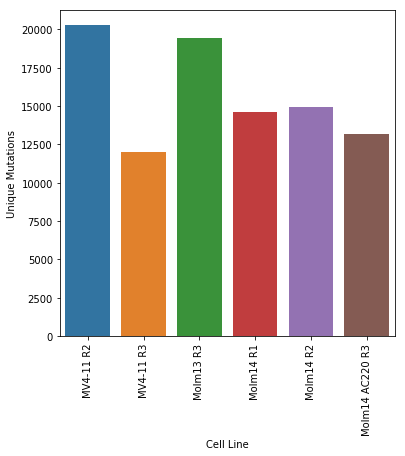

In [11]:
# Again remove Molm14 R3
d = {'Cell Line':['MV4-11 R2', 'MV4-11 R3', 'Molm13 R3', 'Molm14 R1', 'Molm14 R2', 'Molm14 AC220 R3'],
    'Unique Mutations':[20265, 12010, 19412, 14632, 14917, 13190]}
df = pd.DataFrame(d)

# Plot usining sns borplot
plt.figure(figsize=(6,6))
sns.barplot(x = 'Cell Line', y='Unique Mutations', data=df)
plt.xticks(rotation='vertical')

In [12]:
print('Each cell line has on average {} unique protein-coding mutations, with a standard deviation of {}'.format(np.mean(df['Unique Mutations']), np.std(df['Unique Mutations'])))

Each cell line has on average 15737.666666666666 unique protein-coding mutations, with a standard deviation of 3062.666848062685
